In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/yogini/Downloads/Traffic_Violations.csv')
#df.head()
#df['Date Of Stop'].max()
#df.columns.values.tolist()#
d1=df.dropna()


train, test = train_test_split(d1, test_size = 0.2)


In [37]:
testyear=d1.groupby(['Date Of Stop'])
#d=train.groupby(['Accident'])
#testyear['Date Of Stop'].size()
d1['stop-year']=pd.DatetimeIndex(d1['Date Of Stop']).year
d1['stop-month']=pd.DatetimeIndex(d1['Date Of Stop']).month

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
d1.groupby(['stop-year','stop-month']).size()
#tst.groupby(['stop-year'],['stop-month']).size()
#df.groupby(['col5', 'col2']).size().groupby(level=1).max()


stop-year  stop-month
2015       3                 1
           4                 3
           6                 1
           10               12
           11                5
           12               10
2016       1                19
           2                14
           3              6412
           4             18075
           5             16048
           6             17307
           7             15199
           8             15938
           9             14809
           10            15197
           11            14808
           12             6977
dtype: int64

In [39]:
q=d1[(d1['stop-year'] == 2016) & (d1['stop-month'] >= 9)]

In [40]:
df_new = pd.read_csv('/Users/yogini/Downloads/Traffic_Violations_new.csv')
#df.head()
#df['Date Of Stop'].max()
#df.columns.values.tolist()#
d1_new=df_new.dropna()
d1_new['stop-year']=pd.DatetimeIndex(d1_new['Date Of Stop']).year
d1_new['stop-month']=pd.DatetimeIndex(d1_new['Date Of Stop']).month

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [115]:
d1_new.Belts.replace(['No', 'Yes'], [0, 1], inplace=True)
d1_new.Accident.replace(['No', 'Yes'], [0, 1], inplace=True)
d1_new['Contributed To Accident'].replace(['No', 'Yes'], [0, 1], inplace=True)
d1_new['Property Damage'].replace(['No', 'Yes',''], [0, 1,0], inplace=True)
d1_new['HAZMAT'].replace(['No', 'Yes'], [0, 1], inplace=True)
d1_new['Commercial Vehicle'].replace(['No', 'Yes'], [0, 1], inplace=True)
d1_new['Alcohol'].replace(['No', 'Yes'], [0, 1], inplace=True)
d1_new['Work Zone'].replace(['No', 'Yes'], [0, 1], inplace=True)
d1_new['Personal Injury'].replace(['No', 'Yes',''], [0, 1,0], inplace=True)

//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
d1_new.groupby(['stop-year','stop-month']).size()

stop-year  stop-month
2012       1              8496
           2              9019
           3             10216
           4             10360
           5             16078
           6             12155
           7             10921
           8             11519
           9             11019
           10            12236
           11            12534
           12            11082
2013       1             11469
           2             11289
           3             13479
           4             12163
           5             14717
           6             10987
           7             12724
           8             13536
           9             13891
           10            12077
           11            11777
           12            12652
2014       1             12238
           2             12479
           3             15520
           4             17484
           5             18650
           6             14755
                         ...  
           8     

In [117]:
q=d1_new[(d1_new['stop-year'] >= 2016)]

In [118]:
data_without2016=d1_new[(d1_new['stop-year'] < 2016)]

In [119]:
train, test = train_test_split(data_without2016, test_size = 0.2)

In [120]:
q.describe()

,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Year,Contributed To Accident,stop-year,stop-month
count,195930.000000,195930.000000,195930.0,195930.000000,195930.000000,195930.000000,195930.000000,195930.0,195930.000000,195930.000000,195930.000000,195930.000000,195930.000000,195930.000000
mean,39.083077,-77.111777,0.0,0.036666,0.012744,0.020737,0.000071,0.0,0.001383,0.000403,2006.686332,0.027030,2016.014536,6.249349
std,0.067504,0.095391,0.0,0.187941,0.112169,0.142503,0.008453,0.0,0.037165,0.020076,73.315817,0.162171,0.119685,3.432080
min,38.502245,-77.732257,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000
25%,39.036113,-77.193812,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2003.000000,0.000000,2016.000000,3.000000
50%,39.071958,-77.093917,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2007.000000,0.000000,2016.000000,6.000000
75%,39.133732,-77.046262,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2012.000000,0.000000,2016.000000,9.000000
max,40.111822,-73.450178,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,9999.000000,1.000000,2017.000000,12.000000


In [121]:
train.describe()

,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Year,Contributed To Accident,stop-year,stop-month
count,544594.000000,544594.000000,544594.0,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000
mean,39.067466,-77.097080,0.0,0.037597,0.011572,0.017453,0.000110,0.008129,0.002044,0.000149,2004.064117,0.022090,2013.682826,6.600012
std,1.449207,1.290649,0.0,0.190219,0.106949,0.130953,0.010496,0.089794,0.045161,0.012195,82.864441,0.146976,1.105651,3.365427
min,-94.610988,-77.732495,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,39.030120,-77.195399,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,0.000000,2013.000000,4.000000
50%,39.074346,-77.093890,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,0.000000,2014.000000,7.000000
75%,39.139488,-77.042788,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,2015.000000,10.000000
max,39.704022,41.543160,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9999.000000,1.000000,2015.000000,12.000000


In [152]:
q.to_csv('/Users/yogini/Downloads/Traffic_Violations_test_timeseries.csv')

In [153]:
data_without2016.to_csv('/Users/yogini/Downloads/Traffic_Violations_train_timeseries.csv')

In [122]:
df_new.to_csv('/Users/yogini/Downloads/Traffic_Violations_new_2016.csv')

In [123]:
train.to_csv('/Users/yogini/Downloads/Traffic_Violations_train.csv')

In [124]:
test.to_csv('/Users/yogini/Downloads/Traffic_Violations_test.csv')

# Data Analysis
All the Data is split beween 3 areas - 2016 & above for time series. Train for performing validations and analysis. And Test for verifying thr model. Analysis start from the below cell

In [125]:
train.describe()

,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Year,Contributed To Accident,stop-year,stop-month
count,544594.000000,544594.000000,544594.0,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000,544594.000000
mean,39.067466,-77.097080,0.0,0.037597,0.011572,0.017453,0.000110,0.008129,0.002044,0.000149,2004.064117,0.022090,2013.682826,6.600012
std,1.449207,1.290649,0.0,0.190219,0.106949,0.130953,0.010496,0.089794,0.045161,0.012195,82.864441,0.146976,1.105651,3.365427
min,-94.610988,-77.732495,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,39.030120,-77.195399,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,0.000000,2013.000000,4.000000
50%,39.074346,-77.093890,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,0.000000,2014.000000,7.000000
75%,39.139488,-77.042788,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,2015.000000,10.000000
max,39.704022,41.543160,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9999.000000,1.000000,2015.000000,12.000000


In [126]:
pd.crosstab(train['Belts'],train['Property Damage'])

Property Damage,0,1
Belts,,
0,515852,8267
1,19237,1238


In [127]:
pd.crosstab(train['Alcohol'],train['Property Damage'])


Property Damage,0,1
Alcohol,,
0,534044,9437
1,1045,68


In [128]:
pd.crosstab(train['Personal Injury'],train['Property Damage'])
#t.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Property Damage,0,1
Personal Injury,,
0,528787,9505
1,6302,0


In [129]:
pd.crosstab(train['Fatal'],train['Property Damage'])


Property Damage,0,1
Fatal,,
No,534975,9505
Yes,114,0


In [130]:
pd.crosstab(train['HAZMAT'],train['Property Damage'])


Property Damage,0,1
HAZMAT,,
0,535031,9503
1,58,2


Personal injury, Fataly and Vehicle type do not seem to have any relation with Property Damage

In [131]:
pd.crosstab(train['VehicleType'],train['Property Damage'])

Property Damage,0,1
VehicleType,,
01 - Motorcycle,5412,131
02 - Automobile,463793,8310
03 - Station Wagon,10211,103
04 - Limousine,390,8
05 - Light Duty Truck,33836,496
06 - Heavy Duty Truck,5503,102
07 - Truck/Road Tractor,564,20
08 - Recreational Vehicle,2197,32
09 - Farm Vehicle,43,0


In [132]:
pd.crosstab(train['Race'],train['Property Damage'])

Property Damage,0,1
Race,,
ASIAN,31694,527
BLACK,165094,2299
HISPANIC,103590,2751
NATIVE AMERICAN,1345,25
OTHER,27568,370
WHITE,205798,3533


In [133]:
pd.crosstab(train['Gender'],train['Property Damage'])


Property Damage,0,1
Gender,,
F,179623,3037
M,354734,6465
U,732,3


In [134]:
d=train.groupby(['Accident'])
print d['Accident'].size()

Accident
0    544594
dtype: int64


In [135]:
pd.crosstab(train['Property Damage'],train['Violation Type'],rownames=['Property Damage'],colnames=['Violation Type'])

Violation Type,Citation,SERO,Warning
Property Damage,,,
0,270213,16,264860
1,8776,0,729


In [136]:
pd.crosstab(train['Alcohol'],train['Personal Injury'],rownames=['Alcohol'],colnames=['Personal Injury'])

Personal Injury,0,1
Alcohol,,
0,537223,6258
1,1069,44


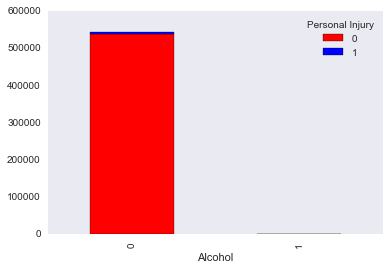

In [139]:
t=pd.crosstab(train['Alcohol'],train['Personal Injury'],rownames=['Alcohol'],colnames=['Personal Injury'])
t.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [138]:
train.Belts.replace(['No', 'Yes'], [0, 1], inplace=True)
train.Accident.replace(['No', 'Yes'], [0, 1], inplace=True)
train['Contributed To Accident'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Property Damage'].replace(['No', 'Yes',''], [0, 1,0], inplace=True)
train['HAZMAT'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Commercial Vehicle'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Alcohol'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Work Zone'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Personal Injury'].replace(['No', 'Yes',''], [0, 1,0], inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [140]:
train['Property Damage'].head()

231432    0
375258    0
902304    0
955895    0
701179    0
Name: Property Damage, dtype: int64

In [141]:
train.groupby(['Belts']).size()

Belts
0    524119
1     20475
dtype: int64

In [142]:
train['Date Of Stop'].head()

231432    10/06/2013
375258    09/13/2015
902304    09/03/2014
955895    07/05/2015
701179    05/11/2015
Name: Date Of Stop, dtype: object

In [143]:
train['Time Of Stop'].head()

231432    22:58:00
375258    01:41:00
902304    23:54:00
955895    12:45:00
701179    21:47:00
Name: Time Of Stop, dtype: object

In [144]:
train.groupby(['Belts']).size()

Belts
0    524119
1     20475
dtype: int64

In [145]:
#train['Date_Of_Stop'] = train['Date Of Stop'].astype('datetime64[ns]')
#d1['stop-month']=pd.DatetimeIndex(d1['Date Of Stop']).month
#train.columns
t1=train.groupby(['stop-year'])


In [146]:
import pandas_highcharts
from pandas_highcharts.core import serialize
train_sub= train
chart = serialize(train, render_to="my-chart", title="My Chart")

#json_data = train.to_json()


In [147]:
train.columns

Index([u'Date Of Stop', u'Time Of Stop', u'Agency', u'SubAgency',
       u'Description', u'Location', u'Latitude', u'Longitude', u'Accident',
       u'Belts', u'Personal Injury', u'Property Damage', u'Fatal',
       u'Commercial License', u'HAZMAT', u'Commercial Vehicle', u'Alcohol',
       u'Work Zone', u'State', u'VehicleType', u'Year', u'Make', u'Model',
       u'Color', u'Violation Type', u'Charge', u'Article',
       u'Contributed To Accident', u'Race', u'Gender', u'Driver City',
       u'Driver State', u'DL State', u'Arrest Type', u'Geolocation',
       u'stop-year', u'stop-month'],
      dtype='object')

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2012.0, right=2012.0
  'left=%s, right=%s') % (left, right))
//anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2013.0, right=2013.0
  'left=%s, right=%s') % (left, right))
//anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2014.0, right=2014.0
  'left=%s, right=%s') % (left, right))
//anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2015.0, right=2015.0
  'left=%s, right=%s') % (left, righ

stop-year
2012    Axes(0.125,0.125;0.775x0.775)
2013    Axes(0.125,0.125;0.775x0.775)
2014    Axes(0.125,0.125;0.775x0.775)
2015    Axes(0.125,0.125;0.775x0.775)
dtype: object

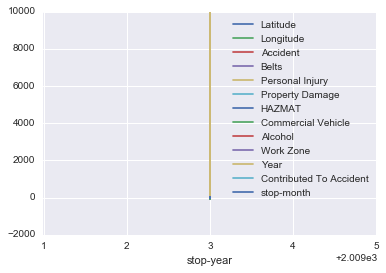

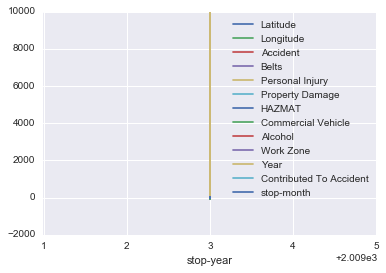

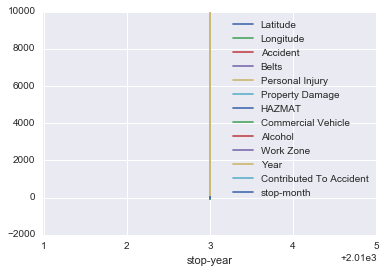

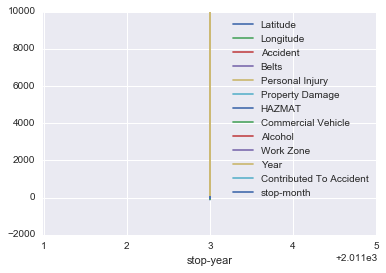

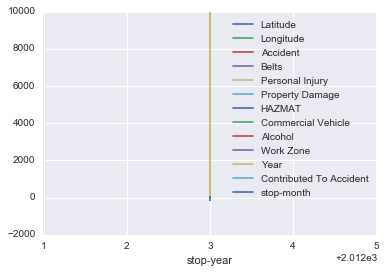

In [148]:
t1.plot.line(x='stop-year')

#df3.plot(x='A', y='B')

In [149]:
from pandas.compat import StringIO

dat = """ts;A;B;C
2015-01-01 00:00:00;27451873;29956800;113
2015-01-01 01:00:00;20259882;17906600;76
2015-01-01 02:00:00;11592256;12311600;48
2015-01-01 03:00:00;11795562;11750100;50
2015-01-01 04:00:00;9396718;10203900;43
2015-01-01 05:00:00;14902826;14341100;53"""
df = pd.read_csv(StringIO(dat), sep=';', index_col='ts', parse_dates='ts')

# Basic line plot
chart = serialize(df, render_to="my-chart", title="My Chart")

<script src="http://code.highcharts.com/highcharts.js"></script>

In [151]:
#df.plot.line()
from pandas_highcharts.display import display_charts

display_charts(df, polar=True, kind='line', ylim=(0, 2.3), title='Angel Deals By Sector')
